#Importing Libraries

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import cross_val_score
import warnings

In [178]:
warnings.filterwarnings('ignore')

#Importing Dataset

In [179]:
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')
df.shape

(270, 14)

#Data Preprocessing

In [180]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [181]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [182]:
df['Heart Disease'] = df['Heart Disease'].apply(lambda x: 1 if x=='Presence' else 0)

In [183]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [184]:
df['Chest pain type'].unique()

array([4, 3, 2, 1])

In [185]:
df['Thallium'].unique()

array([3, 7, 6])

In [186]:
categorized_data = pd.get_dummies(data=df,columns=['Sex','FBS over 120','EKG results','Thallium','Chest pain type','Exercise angina','Slope of ST','Number of vessels fluro','Heart Disease'],drop_first=True)

In [187]:
categorized_data.head()

,Age,BP,Cholesterol,Max HR,ST depression,Sex_1,FBS over 120_1,EKG results_1,EKG results_2,Thallium_6,...,Chest pain type_2,Chest pain type_3,Chest pain type_4,Exercise angina_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Heart Disease_1
0,70,130,322,109,2.4,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,1
1,67,115,564,160,1.6,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,57,124,261,141,0.3,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,64,128,263,105,0.2,1,0,0,0,0,...,0,0,1,1,1,0,1,0,0,0
4,74,120,269,121,0.2,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0


In [188]:
categorized_data.shape

(270, 21)

In [189]:
y = categorized_data['Heart Disease_1']
X = categorized_data.drop(columns=['Heart Disease_1'])

In [190]:
X_scaled = X

#Feature Scaling

In [191]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled.iloc[:,:5] = pd.DataFrame(ss.fit_transform(X.iloc[:,:5]));

In [192]:
scores_dict = {}

#Training the model using Logistic regression

In [193]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#Predicting the results for Logistic regression

In [194]:
scores = cross_val_score(lr,X_scaled,y,cv=5,scoring='accuracy',n_jobs=-1).mean()
scores_dict['Logistic_regression'] = scores.mean()

#Training the model using K Nearest neighbours algorithm

In [195]:
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1, 21))

# Perform k-fold cross-validation for each k value
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy',n_jobs=-1)
    cv_scores.append(np.mean(scores))

# Find the best k value
best_k = k_values[np.argmax(cv_scores)]

In [196]:
print(best_k)
print(max(cv_scores))
scores_dict['KNN'] = max(cv_scores)

5
0.825925925925926


#Training the model using SVM

In [197]:
from sklearn.svm import SVC

svm = SVC()

In [198]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [199]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(svm, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [200]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy,best_parameters)

0.8555555555555555 {'C': 1, 'kernel': 'linear'}


In [201]:
best_svm_model = grid_search.best_estimator_
scores = cross_val_score(best_svm_model, X_scaled, y, cv=5)
print(best_svm_model)

SVC(C=1, kernel='linear')


In [202]:
print(scores)
scores_dict['SVM'] = round(scores.mean(),2)
scores.mean()

[0.75925926 0.87037037 0.88888889 0.87037037 0.88888889]


0.8555555555555555

#Training the model using Naive bayes

In [203]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [204]:
scores = cross_val_score(nb,X_scaled,y,cv=5,scoring='accuracy',n_jobs=-1)
scores.mean()

0.7481481481481482

In [205]:
scores_dict['Naive_Bayes'] = round(scores.mean(),2)

#Training the model using Decision Tree classifier

In [206]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')

In [207]:
scores = cross_val_score(dtc,X_scaled,y,cv=5,scoring='accuracy',n_jobs=-1)
scores.mean()

0.7444444444444445

In [208]:
scores_dict['Decision |Tree Classifier'] = scores.mean()

#training the model using Random Forest Classifier

In [209]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [210]:
scores = cross_val_score(rfc,X_scaled,y,cv=5,scoring='accuracy',n_jobs=-1)
scores.mean()

0.7888888888888889

In [211]:
scores_dict['Random_Forest_Classifier'] = scores.mean()

#Training the model using Neural Networks

In [212]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(11, activation='relu', input_dim=20))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_model = KerasClassifier(build_fn=create_model,epochs=300, batch_size=30, verbose=0)

In [213]:
scores = cross_val_score(keras_model,X_scaled,y,cv=5,scoring='accuracy',n_jobs=-1)

In [214]:
print(scores)
scores_dict['Neural_Networks'] = scores.mean()

[0.74074074 0.83333333 0.83333333 0.87037037 0.88888889]


#Training the model using XG Boost

In [215]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [216]:
scores = cross_val_score(xgb_model,X=X_scaled,y=y,scoring='accuracy',n_jobs=-1)
print(scores)
scores_dict['XG_Boost'] = scores.mean()

[0.68518519 0.7962963  0.83333333 0.75925926 0.81481481]


#Evaluating the best model

In [217]:
for key,value in scores_dict.items():
  print(key,' : ',round(value,2))

Logistic_regression  :  0.86
KNN  :  0.83
SVM  :  0.86
Naive_Bayes  :  0.75
Decision |Tree Classifier  :  0.74
Random_Forest_Classifier  :  0.79
Neural_Networks  :  0.83
XG_Boost  :  0.78


From above results we can see that we can use **Logistic regression** model

In [218]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


<Axes: xlabel='Heart Disease', ylabel='Age'>

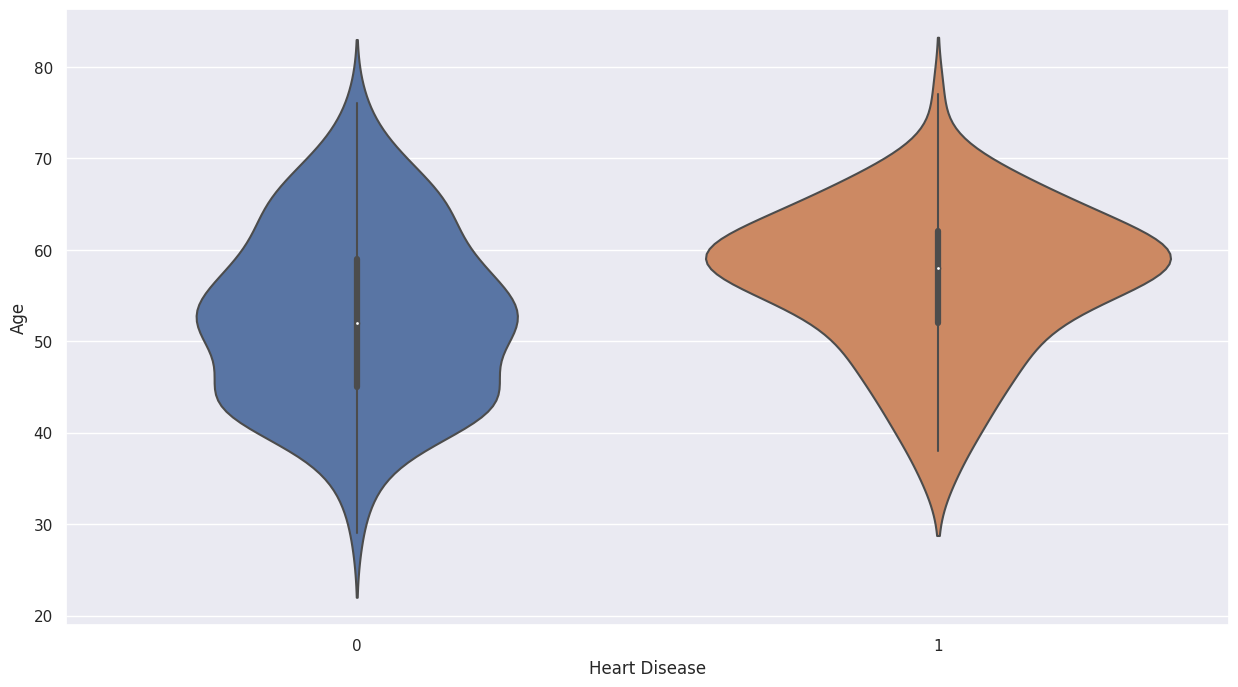

In [219]:
sn.violinplot(x='Heart Disease',y='Age',data=df)

**Age** - Age has effect with heart disease. Mean age for the person having heart disease is not matching with that of a person who does't have heart disease. So, we have to take it

<Axes: xlabel='Heart Disease', ylabel='Sex'>

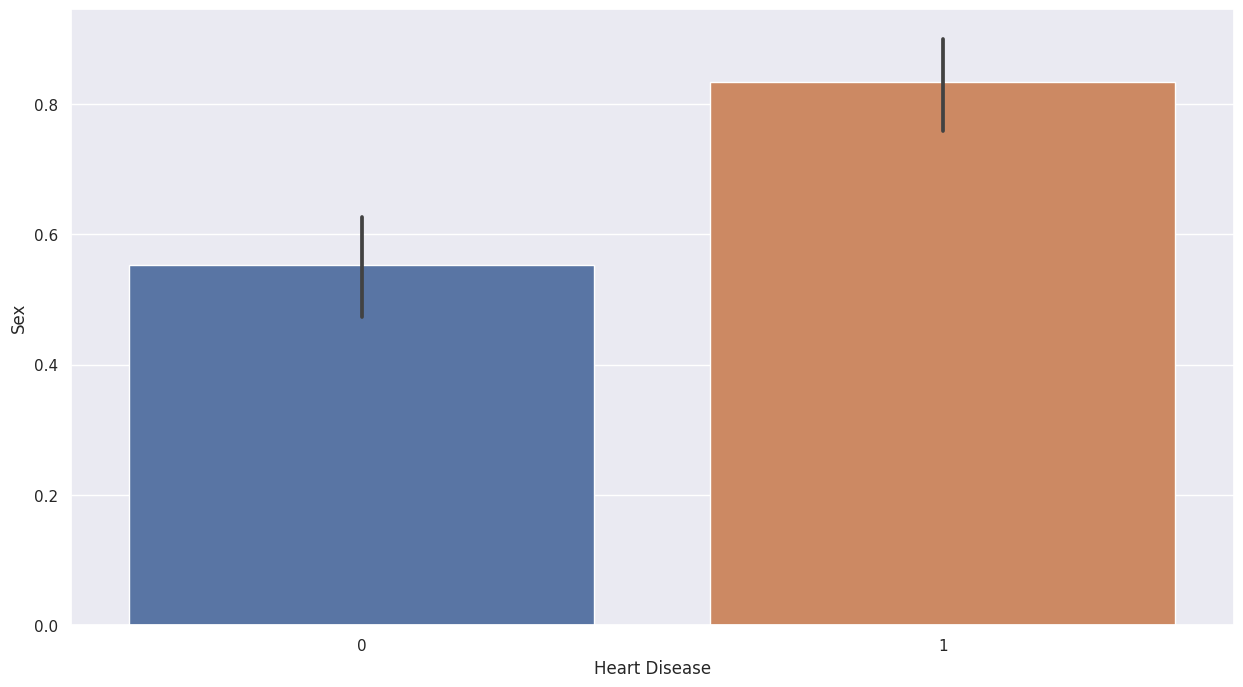

In [220]:
sn.barplot(x='Heart Disease',y='Sex',data=df)

**Sex** - There is difference in values so we have to take it

<Axes: xlabel='Heart Disease', ylabel='Chest pain type'>

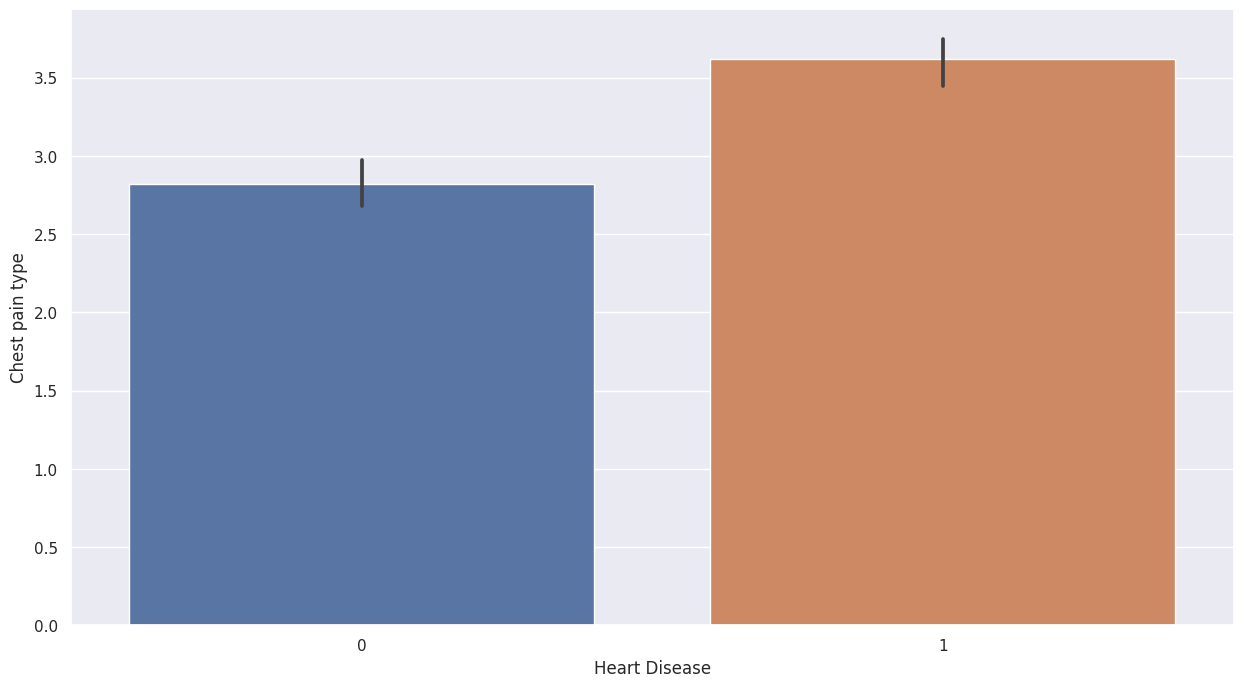

In [221]:
sn.barplot(x='Heart Disease',y='Chest pain type',data=df)

**Chest Pain Type** - We have to take it

<Axes: xlabel='Heart Disease', ylabel='BP'>

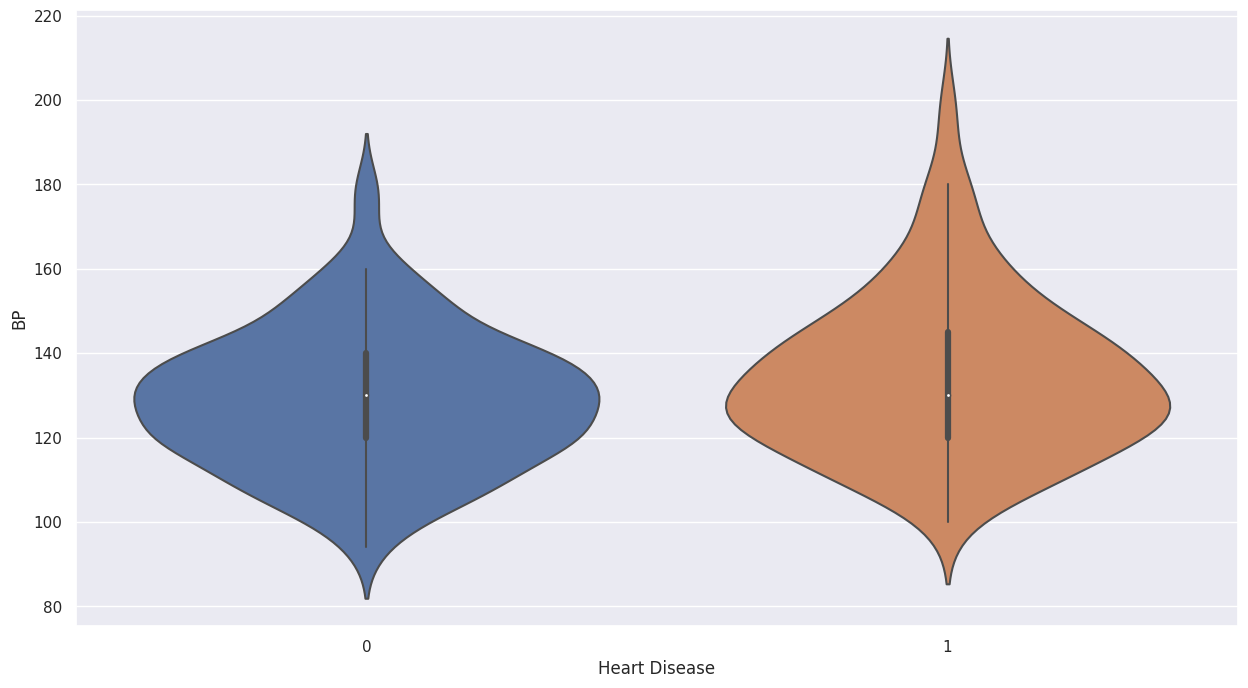

In [222]:
sn.violinplot(x='Heart Disease',y='BP',data=df)

**BP** - We can remove it

<Axes: xlabel='Heart Disease', ylabel='Cholesterol'>

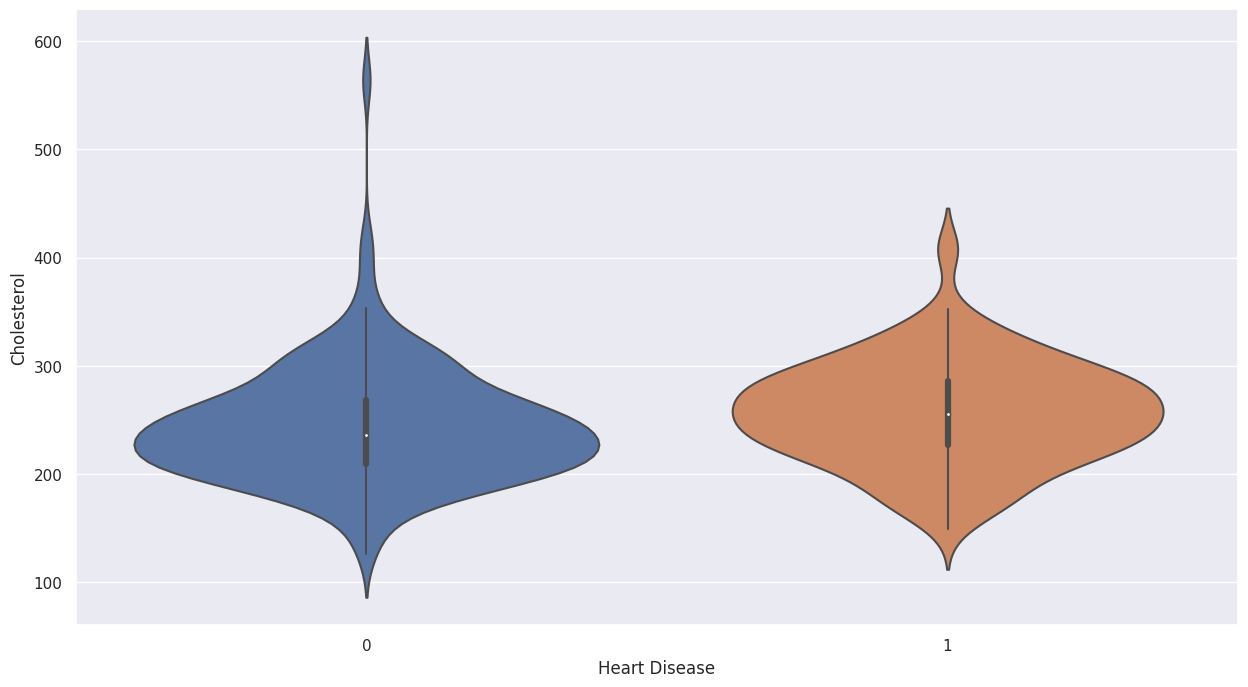

In [223]:
sn.violinplot(x='Heart Disease',y='Cholesterol',data=df)

<Axes: xlabel='Heart Disease', ylabel='FBS over 120'>

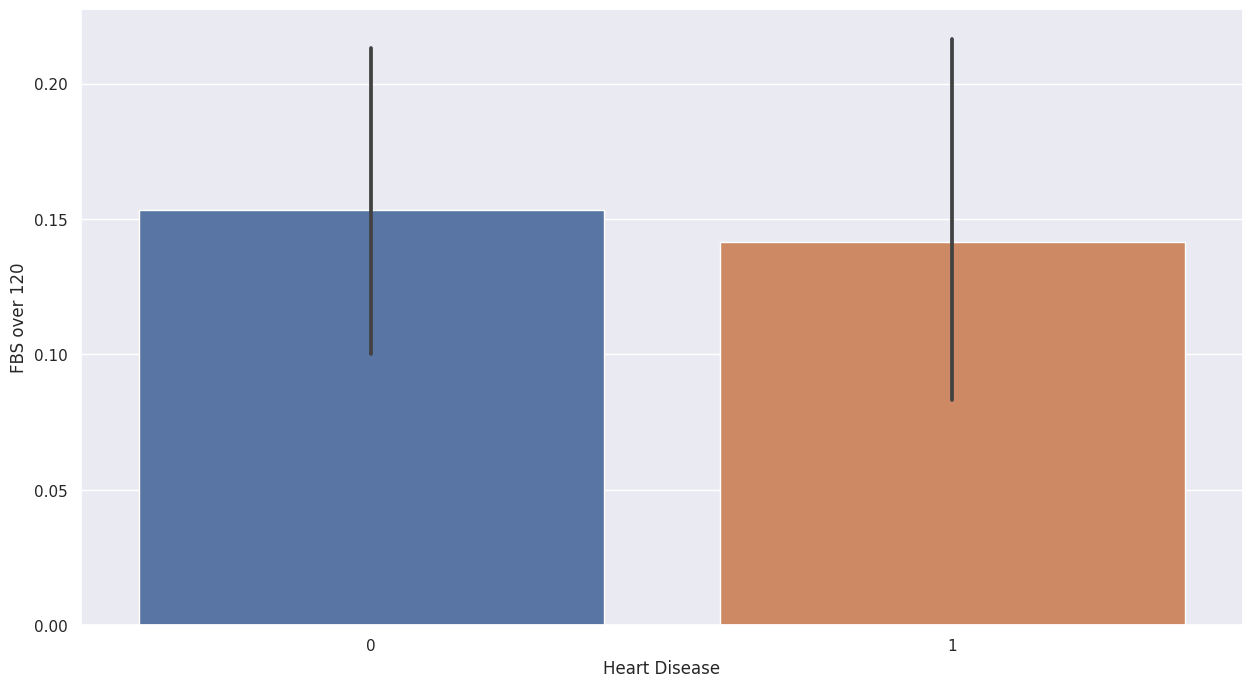

In [224]:
sn.barplot(x='Heart Disease',y='FBS over 120',data=df)

**FBS over 120** - They are almost close so we are not taking this column

<Axes: xlabel='Heart Disease', ylabel='EKG results'>

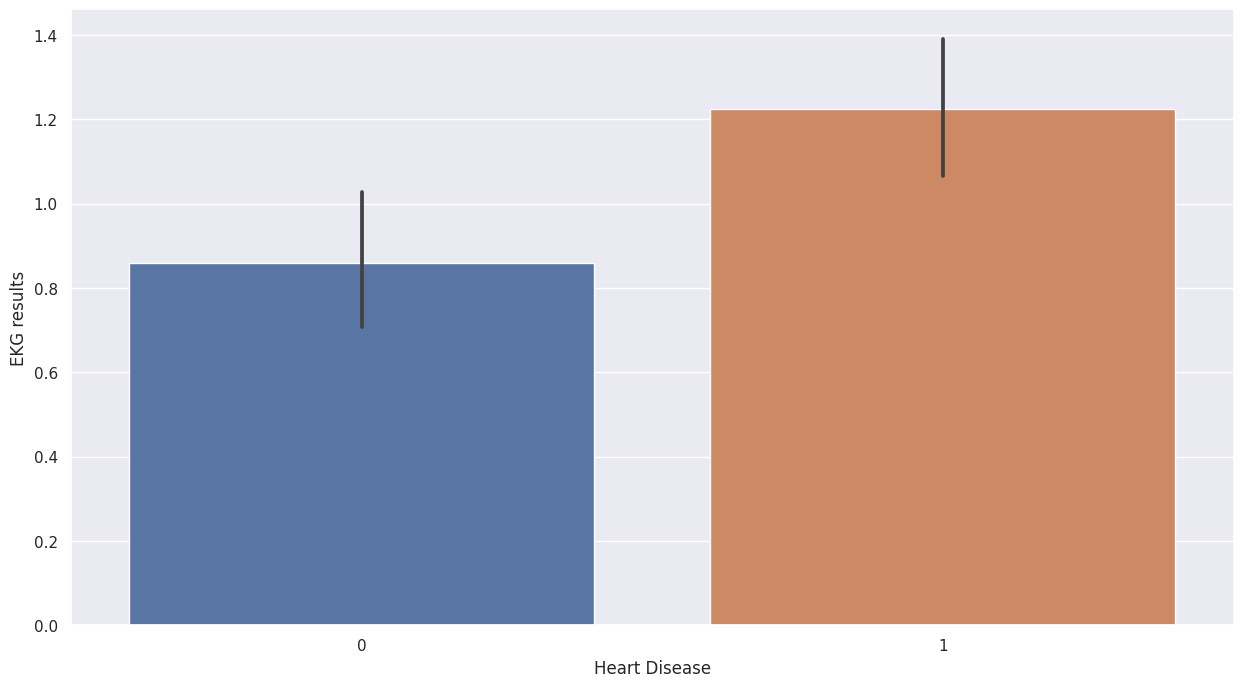

In [225]:
sn.barplot(x='Heart Disease',y='EKG results',data=df)

**EKG results** -  we have to take it

<Axes: xlabel='Heart Disease', ylabel='Max HR'>

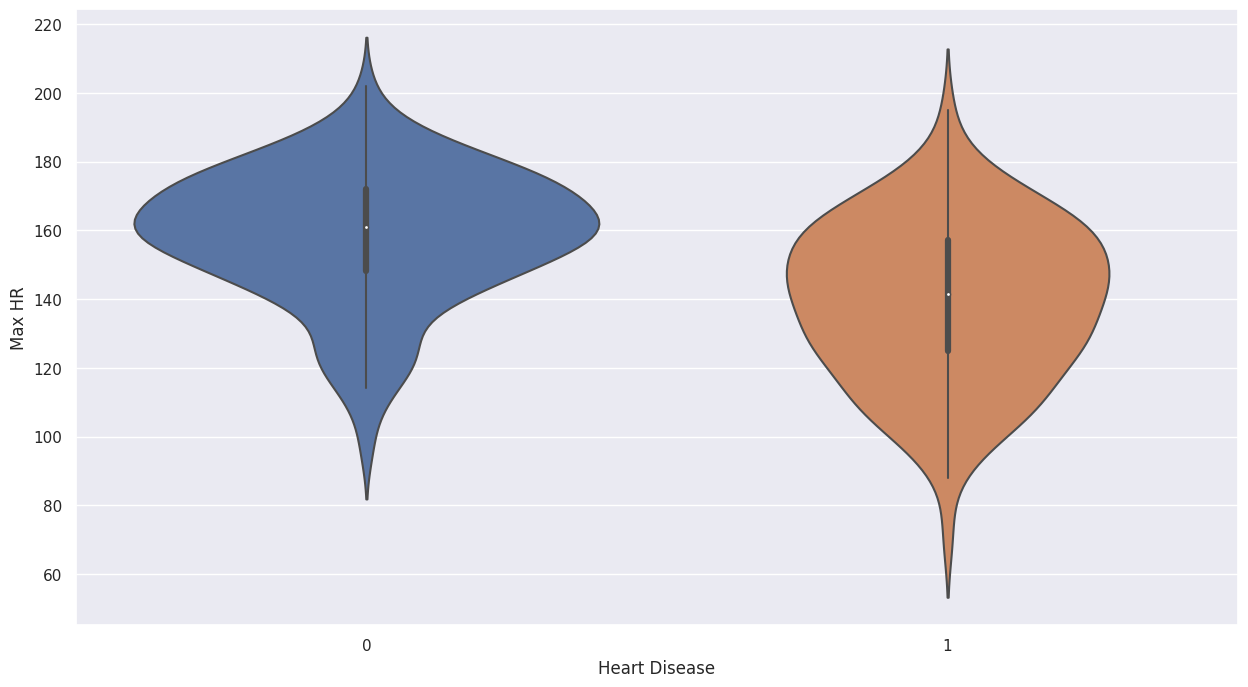

In [226]:
sn.violinplot(x='Heart Disease',y='Max HR',data=df)

<Axes: xlabel='Heart Disease', ylabel='Exercise angina'>

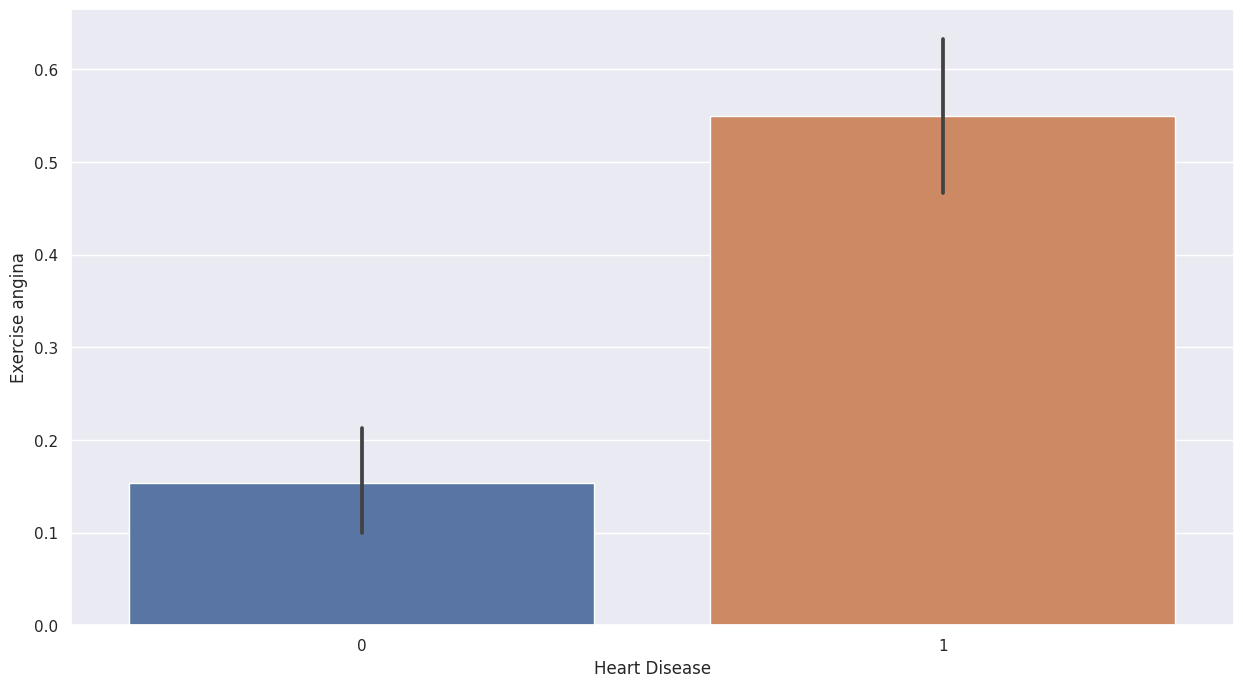

In [227]:
sn.barplot(x='Heart Disease',y='Exercise angina',data=df)

<Axes: xlabel='Heart Disease', ylabel='ST depression'>

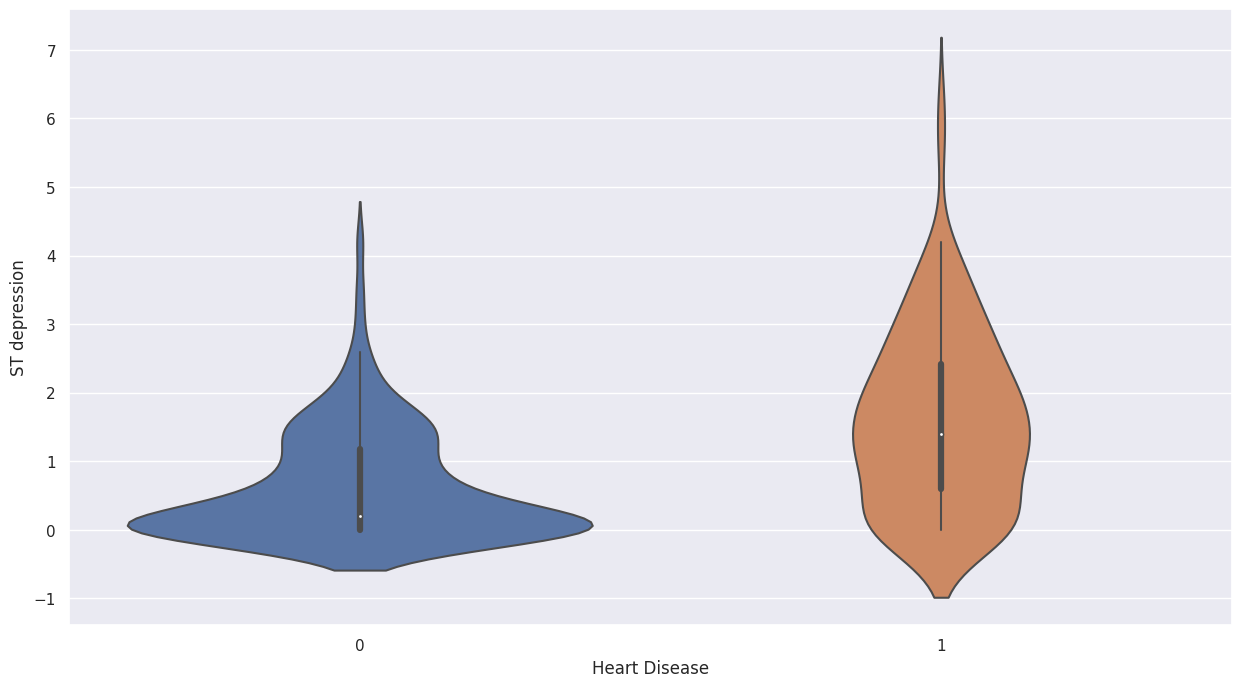

In [228]:
sn.violinplot(x='Heart Disease',y='ST depression',data=df)

<Axes: xlabel='Heart Disease', ylabel='Slope of ST'>

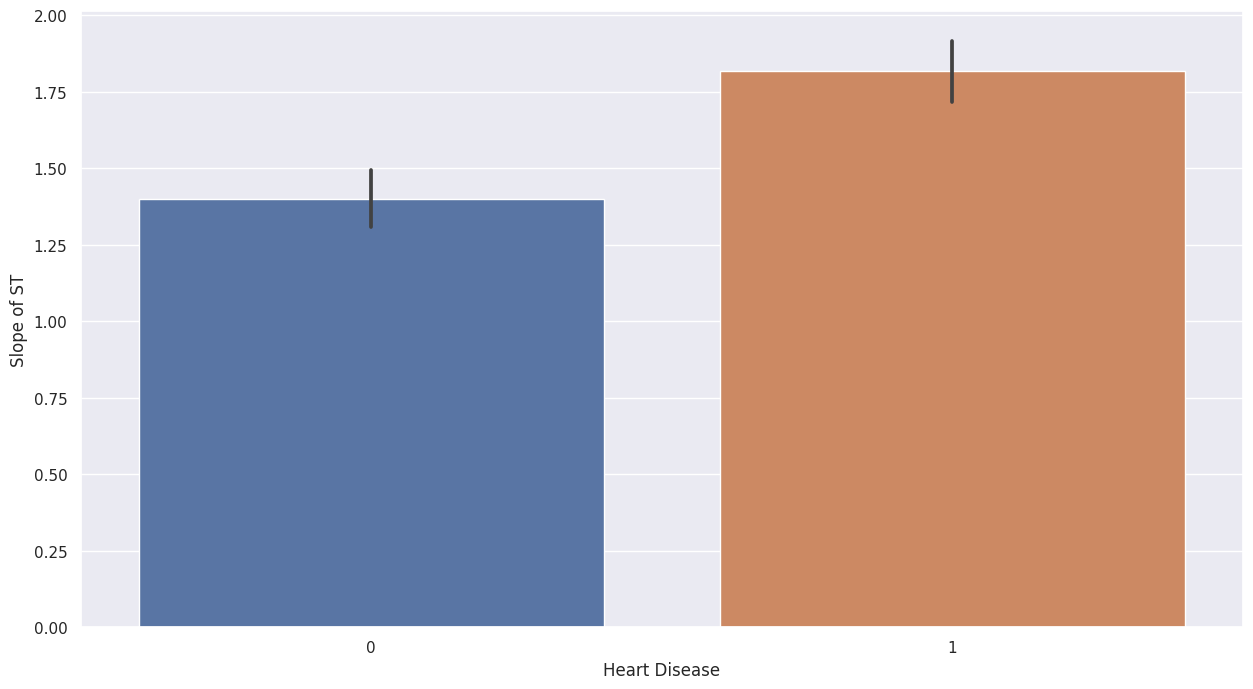

In [229]:
sn.barplot(x='Heart Disease',y='Slope of ST',data=df)

<Axes: xlabel='Heart Disease', ylabel='Number of vessels fluro'>

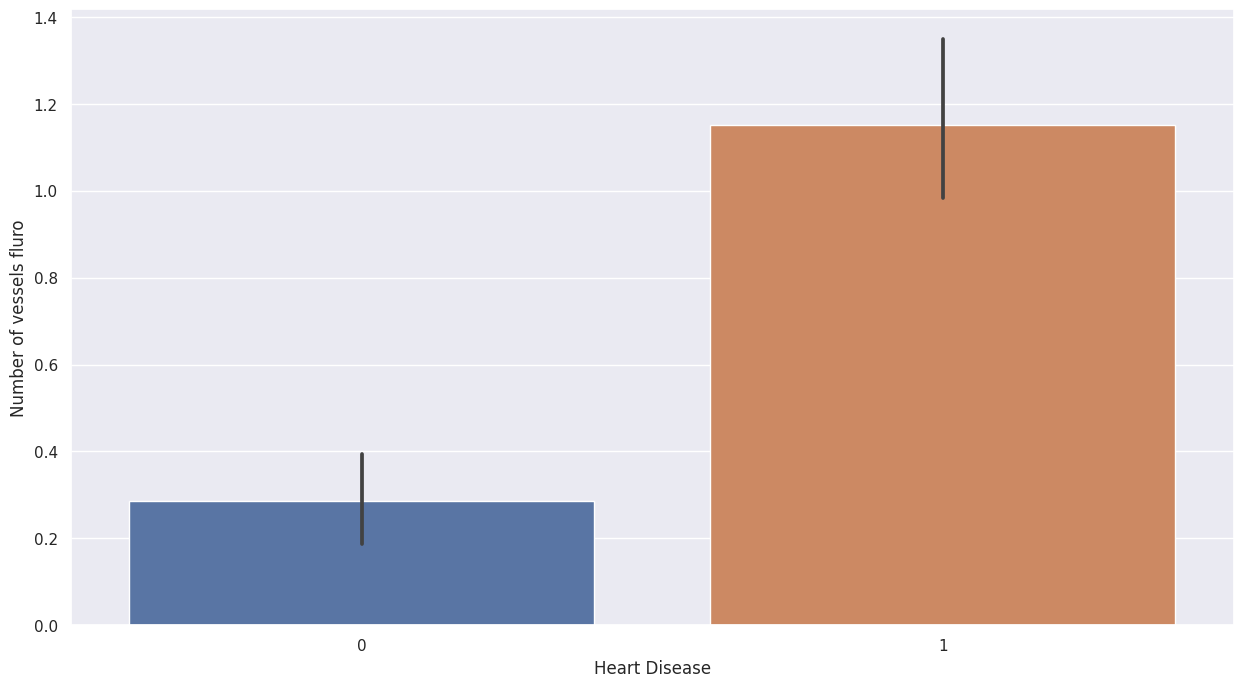

In [230]:
sn.barplot(x='Heart Disease',y='Number of vessels fluro',data=df)

<Axes: xlabel='Heart Disease', ylabel='Thallium'>

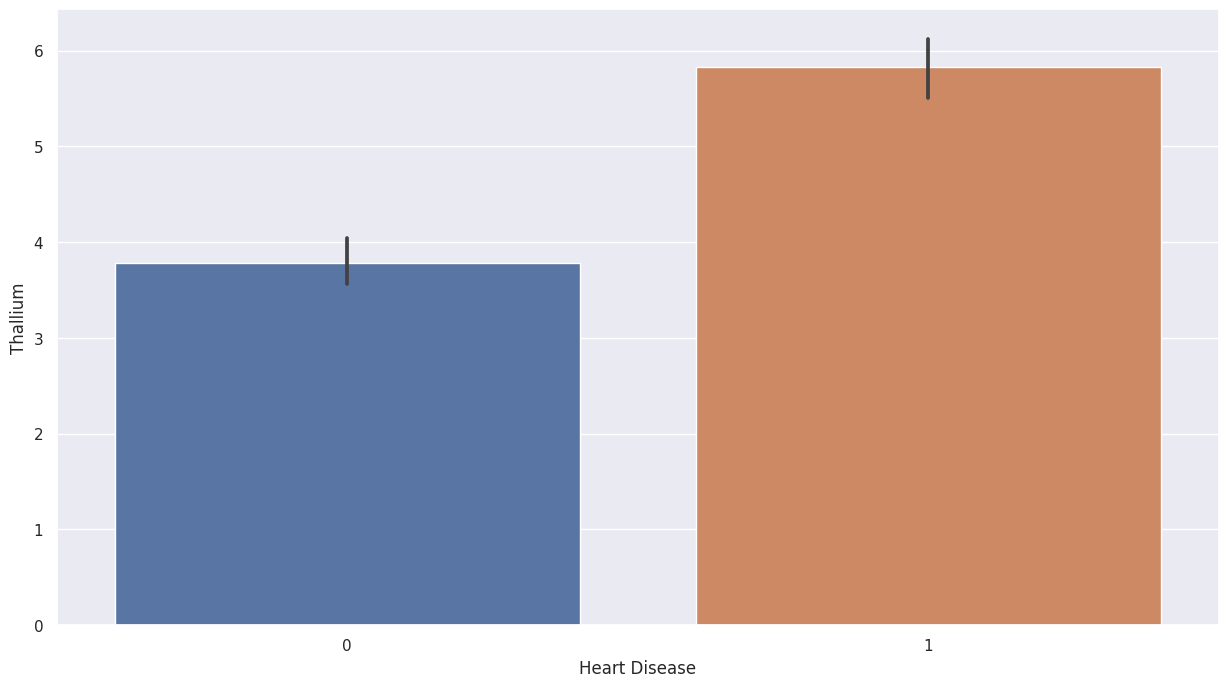

In [231]:
sn.barplot(x='Heart Disease',y='Thallium',data=df)

##Model 2

In [232]:
df_final_rem = df.drop(['BP','FBS over 120'],axis=1)

In [233]:
categorized_data_rem = pd.get_dummies(data=df_final_rem,columns=['Sex','EKG results','Thallium','Chest pain type','Exercise angina','Slope of ST','Number of vessels fluro','Heart Disease'],drop_first=True)

In [234]:
categorized_data_rem.head()

,Age,Cholesterol,Max HR,ST depression,Sex_1,EKG results_1,EKG results_2,Thallium_6,Thallium_7,Chest pain type_2,Chest pain type_3,Chest pain type_4,Exercise angina_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Heart Disease_1
0,70,322,109,2.4,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1
1,67,564,160,1.6,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0
2,57,261,141,0.3,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,64,263,105,0.2,1,0,0,0,1,0,0,1,1,1,0,1,0,0,0
4,74,269,121,0.2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0


In [235]:
X = categorized_data_rem.iloc[:,:-1]
y = categorized_data_rem.iloc[:,-1]

In [236]:
X_scaled_rem = X

In [237]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled_rem.iloc[:,:4] = pd.DataFrame(ss.fit_transform(X.iloc[:,:4]))

In [238]:
X_scaled_rem.head()

,Age,Cholesterol,Max HR,ST depression,Sex_1,EKG results_1,EKG results_2,Thallium_6,Thallium_7,Chest pain type_2,Chest pain type_3,Chest pain type_4,Exercise angina_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3
0,1.712094,1.402212,-1.759208,1.181012,1,0,1,0,0,0,0,1,0,1,0,0,0,1
1,1.382140,6.093004,0.446409,0.481153,0,0,1,0,1,0,1,0,0,1,0,0,0,0
2,0.282294,0.219823,-0.375291,-0.656118,1,0,0,0,1,1,0,0,0,0,0,0,0,0
3,1.052186,0.258589,-1.932198,-0.743600,1,0,0,0,1,0,0,1,1,1,0,1,0,0
4,2.152032,0.374890,-1.240239,-0.743600,0,0,1,0,0,1,0,0,1,0,0,1,0,0


#Training model 2 using Logistic regression

In [239]:
scores_dict2 = {}

In [240]:
lr2 = LogisticRegression()
scores = cross_val_score(lr2, X=X_scaled_rem,scoring='accuracy', y=y, cv=5, n_jobs=-1)

In [241]:
print(scores)
scores_dict2['Logistic_Regression'] = round(scores.mean(),3)

[0.74074074 0.85185185 0.87037037 0.87037037 0.88888889]


#Training model 2 using KNN

In [242]:
k_values = list(range(1,25))

for k in k_values:
  knn2 = KNeighborsClassifier(k)
  scores = cross_val_score(knn2, X_scaled_rem, y, cv=5, scoring='accuracy',n_jobs=-1)
  cv_scores.append(np.mean(scores))

best_k = np.argmax(scores)

In [243]:
print('Best k value = ',best_k)
print('Best accuracy score = ',max(scores))

Best k value =  4
Best accuracy score =  0.8518518518518519


In [244]:
scores_dict2['KNN'] = round(max(scores),3)

#Training model 2 using Naive Bayes

In [245]:
nb2 = GaussianNB()
scores = cross_val_score(nb2,X=X_scaled_rem,y=y,cv=5,n_jobs=-1)

In [246]:
print(scores)
scores_dict2['Naive_Bayes'] = scores.mean()

[0.74074074 0.62962963 0.77777778 0.81481481 0.81481481]


#Training the model 2 using SVM

In [247]:
svm2 = SVC()

In [248]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(svm, param_grid=parameters, cv=5, scoring='accuracy')

parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search.fit(X_scaled_rem, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [249]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy,best_parameters)

0.8481481481481483 {'C': 1, 'kernel': 'linear'}


In [250]:
best_svm_model = grid_search.best_estimator_
scores = cross_val_score(best_svm_model, X_scaled_rem, y, cv=5)
print(best_svm_model)
print(scores)
scores_dict['SVM'] = round(scores.mean(),2)
scores_dict2['SVM'] = round(scores.mean(),3)

SVC(C=1, kernel='linear')
[0.77777778 0.83333333 0.92592593 0.83333333 0.87037037]


#Training the model 2 using Decision Tree Classifier

In [251]:
dtc2 = DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(dtc2,X_scaled_rem,y,cv=5,n_jobs=-1)

In [252]:
print(scores)
scores_dict2['Decision_Tree_Classifier'] = round(scores.mean(),3)

[0.7037037  0.83333333 0.75925926 0.83333333 0.83333333]


#Training the model 2 using Random Forest Classifier

In [253]:
rfc2 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
scores = cross_val_score(rfc2,X_scaled_rem,y,cv=5,n_jobs=-1)

In [254]:
print(scores)
scores_dict2['Random_Forest_Classifier'] = round(scores.mean(),3)

[0.7037037  0.81481481 0.81481481 0.74074074 0.81481481]


#Training the model 2 using Neural Networks

In [255]:
def create_model2():
    model = Sequential()
    model.add(Dense(11, activation='relu', input_dim=18))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_model2 = KerasClassifier(build_fn=create_model2,epochs=300, batch_size=30, verbose=0)
scores = cross_val_score(keras_model2,X=X_scaled_rem,y=y,scoring='accuracy',n_jobs=-1)

In [256]:
print(scores)
scores_dict2['Neural_Networks'] = scores.mean()

[0.75925926 0.81481481 0.81481481 0.81481481 0.85185185]


#Training model 2 using XG Boost

In [257]:
xgb_model2 = xgb.XGBClassifier(objective='binary:logistic',random_state=42)

scores = cross_val_score(xgb_model2,X=X_scaled_rem,y=y,scoring='accuracy',n_jobs=-1)

In [258]:
print(scores)
scores_dict2['xgb_model'] = scores.mean()

[0.68518519 0.83333333 0.81481481 0.85185185 0.81481481]


#Evaluating the best model

**Model 1**

In [259]:
models1 = []
accuracy1 = []
for key, value in scores_dict.items():
  models1.append(key)
  accuracy1.append(value*100)

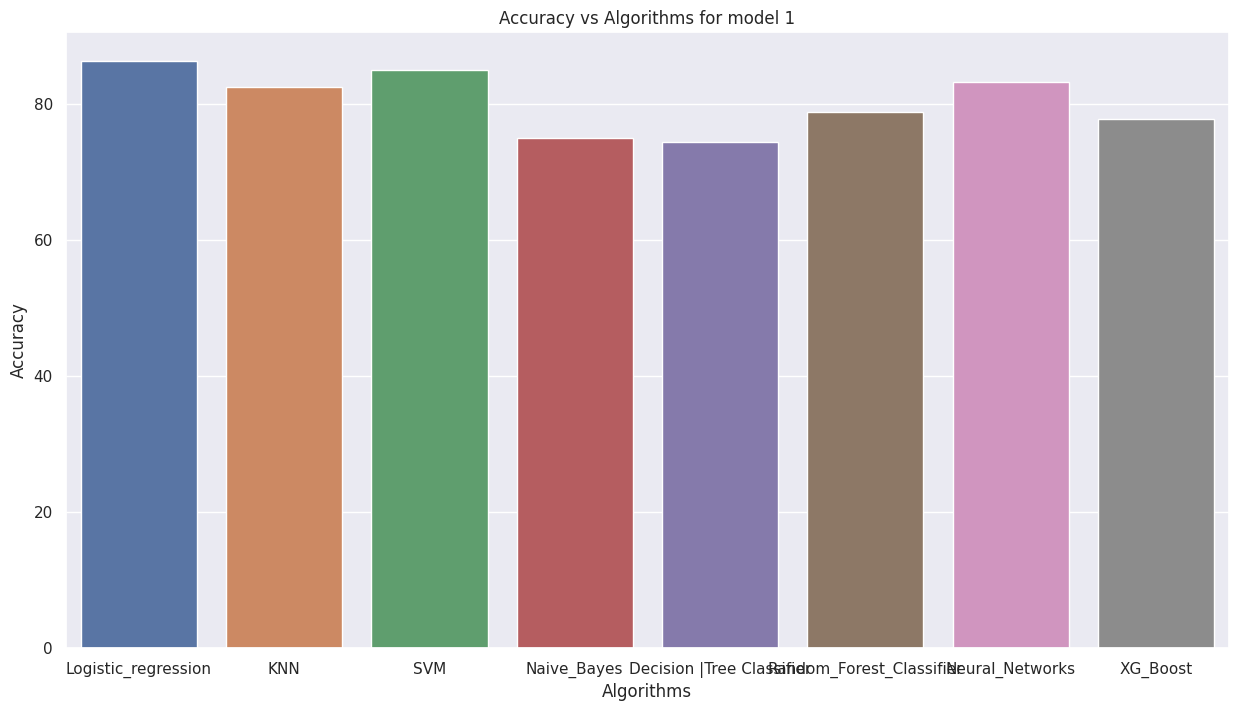

In [264]:
import matplotlib.pyplot as plt

sn.set(rc={'figure.figsize':(15,8)})
sn.barplot(x=models1,y=accuracy1)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Algorithms for model 1')
plt.show()

In [261]:
models2 = []
accuracy2 = []
for key, value in scores_dict2.items():
  models2.append(key)
  accuracy2.append(value*100)

Model 1 Logistic regression is better for this dataset

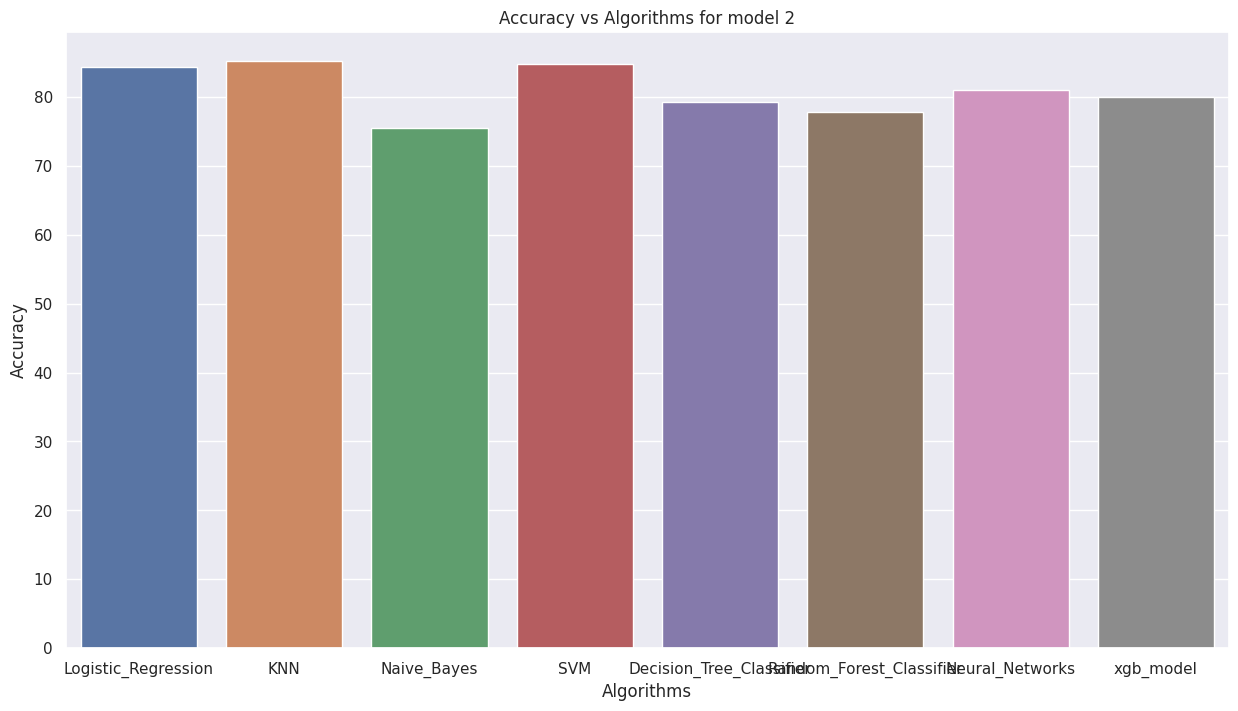

In [263]:
import matplotlib.pyplot as plt

sn.set(rc={'figure.figsize':(15,8)})
sn.barplot(x=models2,y=accuracy2)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Algorithms for model 2')
plt.show()